In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Set the paths and parameters
data_dir = r'A:\face_disease\DATA\train'
classes = ['Acne','Actinic Keratosis','Basal Cell Carcinom','Eczemaa','Rosacea']
num_classes = len(classes)
input_shape = (150, 150, 3)  # Input image dimensions



# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)


# Load the dataset using ImageDataGenerator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 50
history = model.fit(train_generator, epochs=epochs)


# Evaluate the model
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

score = model.evaluate(train_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('skin_disease_model.h5')

# Load the saved model

saved_model = load_model('skin_disease_model.h5')





Found 440 images belonging to 5 classes.



Epoch 1/50


14/14 [==============================] - 6s 353ms/step - loss: 1.7909 - accuracy: 0.2205
Epoch 2/50
14/14 [==============================] - 5s 323ms/step - loss: 1.5468 - accuracy: 0.2841
Epoch 3/50
14/14 [==============================] - 4s 314ms/step - loss: 1.3776 - accuracy: 0.4159
Epoch 4/50
14/14 [==============================] - 5s 316ms/step - loss: 1.2911 - accuracy: 0.4841
Epoch 5/50
14/14 [==============================] - 4s 307ms/step - loss: 1.1876 - accuracy: 0.4886
Epoch 6/50
14/14 [==============================] - 4s 308ms/step - loss: 1.0523 - accuracy: 0.5727
Epoch 7/50
14/14 [==============================] - 4s 307ms/step - loss: 0.8870 - accuracy: 0.6136
Epoch 8/50
14/14 [==============================] - 4s 299ms/step - loss: 0.7816 - accuracy: 0.6705
Epoch 9/50
14/14 [==============================] - 4s 300ms/step - loss: 0.7066 - accuracy: 0.7455
Epoch 10/50
14/14 [==============================] - 

c:\Users\swath\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 29ms/step


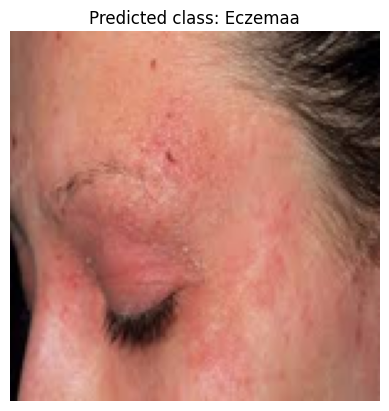

In [10]:
test_image_path = r'A:\face_disease\DATA\train\Eczemaa\eczema4.jpg'
test_image = Image.open(test_image_path).resize((input_shape[0], input_shape[1]))
test_image_array = np.array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)
test_image_array = test_image_array / 255.0

# Make predictions on the test image
predictions = saved_model.predict(test_image_array)
predicted_class = np.argmax(predictions)
predicted_label = classes[predicted_class]


# Display the test image along with the predicted class
plt.imshow(test_image)
plt.title(f'Predicted class: {predicted_label}')
plt.axis('off')
plt.show()